In [106]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# 그래프를 쥬피터에서 바로 그리게 하는 방법

In [44]:
!pip3 install beautifulsoup4

In [48]:
!pip3 install nltk

In [29]:
!pip3 install wordcloud

In [2]:
train = pd.read_csv("c:/kaggle/word2vec-nlp-tutorial/labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

In [3]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
train.tail()

,id,sentiment,review
24995,"""3453_3""",0,"""It seems like more consideration has gone int..."
24996,"""5064_1""",0,"""I don't believe they made this film. Complete..."
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui..."
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the..."
24999,"""8478_8""",1,"""I saw this movie as a child and it broke my h..."


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [6]:
train.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [7]:
print('전체 학습 데이타 개수: {}'.format(len(train)))

전체 학습 데이타 개수: 25000


In [8]:
train_length = train['review'].apply(len)

In [9]:
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

In [10]:
train_length.tail()

24995     582
24996     977
24997     643
24998    1143
24999     944
Name: review, dtype: int64

C:\Users\phyon\.conda\envs\py3_7_6\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of review')

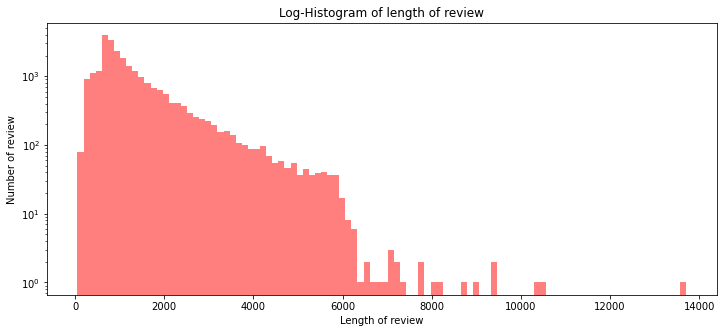

In [11]:
plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=100, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')


In [12]:
print('리뷰 길이 최대값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))

print('리뷰 길이 제 1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3사분위: {}'.format(np.percentile(train_length, 75)))


리뷰 길이 최대값: 13710
리뷰 길이 최소값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값: 983.0
리뷰 길이 제 1사분위: 705.0
리뷰 길이 제 3사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x18500de2e48>,
 'caps': [<matplotlib.lines.Line2D at 0x18500e1b208>,
 'boxes': [<matplotlib.lines.Line2D at 0x18500e26688>],
 'medians': [<matplotlib.lines.Line2D at 0x18500e26388>],
 'fliers': [<matplotlib.lines.Line2D at 0x18500e1d248>],
 'means': [<matplotlib.lines.Line2D at 0x18500e2da88>]}

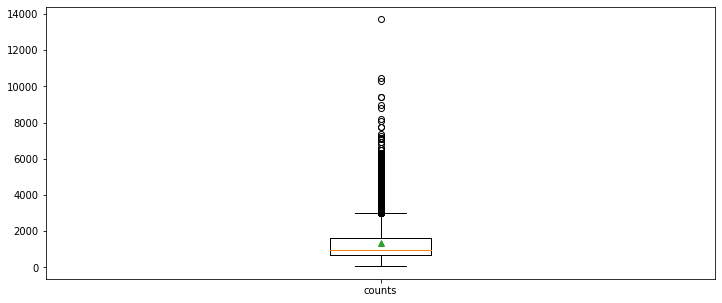

In [13]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

In [14]:
from wordcloud import WordCloud

(-0.5, 799.5, 599.5, -0.5)

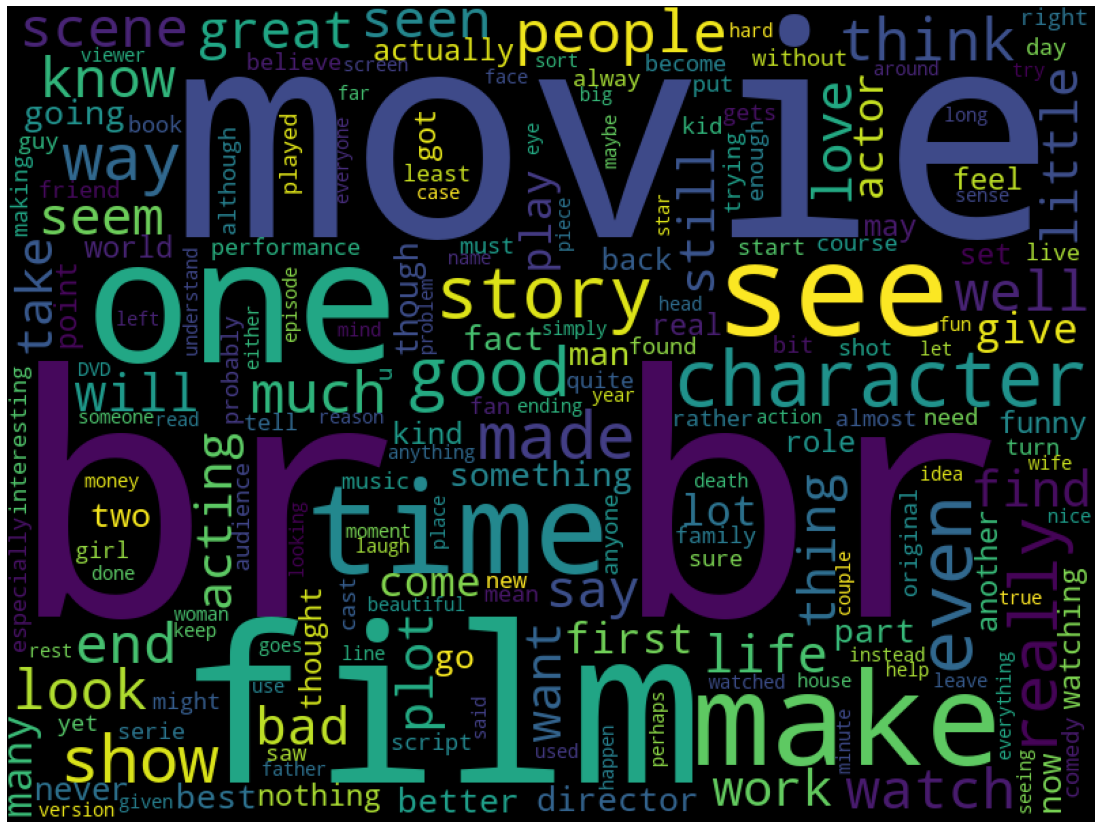

In [15]:
cloud = WordCloud(width=800, height=600).generate(" ".join(train['review']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

C:\Users\phyon\.conda\envs\py3_7_6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sentiment', ylabel='count'>

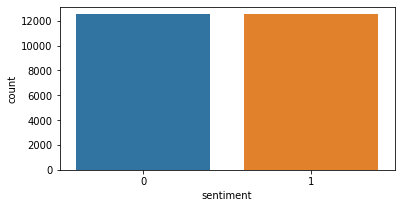

In [16]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train['sentiment'])

In [17]:
print('긍정 리뷰 개수: {}'.format(train['sentiment'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


In [18]:
train_word_counts = train['review'].apply(lambda x:len(x.split(' ')))

C:\Users\phyon\.conda\envs\py3_7_6\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of reviews')

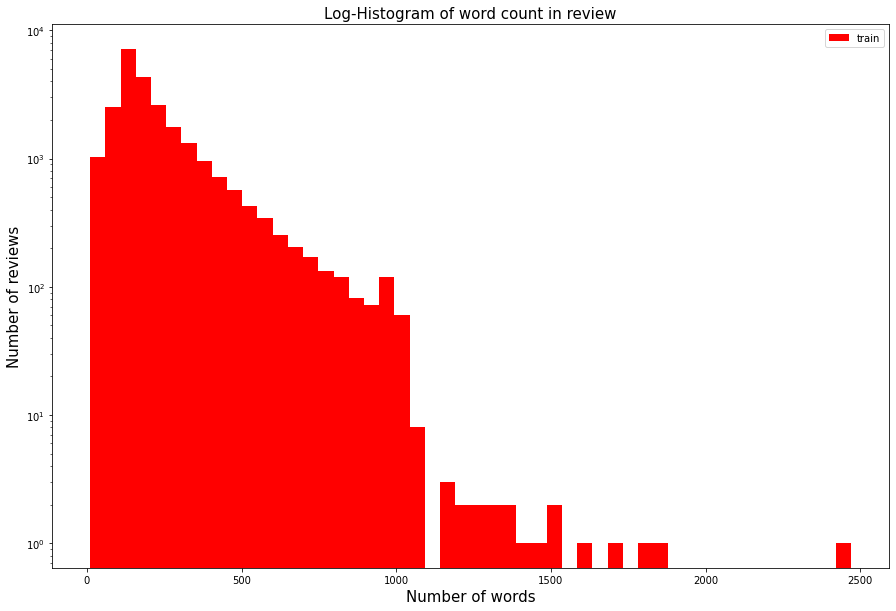

In [19]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [20]:
print('리뷰 단어 개수 최대값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))

print('리뷰 단어 개수 제 1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대값: 2470
리뷰 단어 개수 최소값: 10
리뷰 단어 개수 평균값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간값: 174.0
리뷰 단어 개수 제 1사분위: 127.0
리뷰 단어 개수 제 3사분위: 284.0


In [21]:
qmarks = np.mean(train['review'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train['review'].apply(lambda x: x[0].isupper())) # 첫글자가 대문자
capitals = np.mean(train['review'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자 개수
numbers = np.mean(train['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자 개수

print('물음표가 있는 질문:{:2f}%'.format(qmarks * 100))
print('마침표가 있는 질문:{:2f}%'.format(fullstop * 100))
print('첫글자가 대문자인 질문:{:2f}%'.format(capital_first * 100))
print('대문자가 있는 질문:{:2f}%'.format(capitals * 100))
print('숫자가 있는 질문:{:2f}%'.format(numbers * 100))




물음표가 있는 질문:29.552000%
마침표가 있는 질문:99.688000%
첫글자가 대문자인 질문:0.000000%
대문자가 있는 질문:99.592000%
숫자가 있는 질문:56.656000%


In [22]:
import re
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer


In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phyon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
print(train['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [25]:
review = train['review'][0]
review_text = BeautifulSoup(review, "html").get_text() # HTML 태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text)  # 영어 문자를 제외한 나머지는 모두 공백으로 바꾼다


In [26]:
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [27]:
stop_words = set(stopwords.words('english')) # 영어 불용어 set 을 만든다
review_text = review_text.lower()
words = review_text.split() # 소문자로 변환 후에 단어마다 나눠서 단어 리스트로 만든다
words = [w for w in words if not w in stop_words] # 불용어를 제거한 리스트를 만든다
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [28]:
clean_review = ' '.join(words) # 단어 리스트를 다시 하나의 글로 합친다
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [29]:
def preprocessing(review, remove_stopwords = False):
    review_text = BeautifulSoup(review, "html").get_text()  # HTML 태그 제거
    review_text = re.sub("[^a-zA-Z]", " ", review_text) # 영어 문자를 제외한 나머지는 모두 공백으로 바꾼다
    words = review_text.split() # 소문자로 변환 후에 단어마다 나눠서 단어 리스트로 만든다
    if remove_stopwords:
        stops = set(stopwords.words('english')) # 영어 불용어 set 을 만든다
        words = [w for w in words if not w in stops] # 불용어를 제거한 리스트를 만든다
        clean_review = ' '.join(words) # 단어 리스트를 다시 하나의 글로 합친다
    else:  # 불용어를 제거하지 않을때는 
        clean_review = ' '.join(words)
    return clean_review


In [30]:
clean_train_reviews = []
for review in train['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords = True))
    
clean_train_reviews[0]

'With stuff going moment MJ started listening music watching odd documentary watched The Wiz watched Moonwalker Maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent Moonwalker part biography part feature film remember going see cinema originally released Some subtle messages MJ feeling towards press also obvious message drugs bad kay Visually impressive course Michael Jackson unless remotely like MJ anyway going hate find boring Some may call MJ egotist consenting making movie BUT MJ fans would say made fans true really nice The actual feature film bit finally starts minutes excluding Smooth Criminal sequence Joe Pesci convincing psychopathic powerful drug lord Why wants MJ dead bad beyond Because MJ overheard plans Nah Joe Pesci character ranted wanted people know supplying drugs etc dunno maybe hates MJ music Lots cool things like MJ turning car robot whole Speed Demon sequence Also director must patience saint came filming kiddy Bad

In [31]:
clean_train_df = pd.DataFrame({'review':clean_train_reviews, 'sentiment':train['sentiment']})


In [32]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)   # 텍스트가 인덱스의 벡터값으로 벼환이 됨
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [33]:
print(text_sequences[0])  # 각 단어의 인덱스 값으로 출력

[429, 442, 81, 459, 8931, 547, 2546, 130, 65, 930, 557, 199, 2, 18822, 199, 11366, 185, 89, 18, 707, 2547, 132, 104, 14, 540, 4170, 185, 26, 234, 623, 2423, 1255, 11366, 82, 4925, 82, 679, 4, 280, 81, 15, 331, 1739, 527, 393, 1205, 3358, 8931, 450, 850, 3435, 21, 481, 643, 1572, 19, 4521, 1929, 1056, 165, 376, 1511, 796, 2514, 6, 8931, 458, 81, 681, 80, 262, 393, 106, 582, 8931, 26194, 26195, 135, 3, 29, 8931, 354, 12, 58, 24, 354, 187, 14, 231, 2, 677, 679, 4, 131, 320, 419, 136, 15668, 3408, 1573, 615, 786, 10132, 981, 11704, 879, 1301, 1476, 365, 397, 8931, 245, 19, 618, 1161, 8931, 22361, 2362, 13555, 786, 10132, 33, 28748, 374, 20, 49, 18823, 1572, 425, 11367, 185, 4058, 8931, 130, 670, 540, 90, 6, 8931, 1499, 417, 2247, 129, 1997, 2594, 615, 21, 71, 115, 4974, 5201, 288, 1330, 26196, 19, 615, 534, 797, 681, 674, 5, 432, 184, 487, 129, 658, 3359, 1221, 730, 59, 1236, 248, 3, 20, 6, 8931, 5, 548, 73, 30, 20, 56, 684, 151, 7, 256, 108, 7537, 643, 3532, 8931, 37391, 1942, 3, 144, 376

In [34]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0  # word_index 에는 패딩 정보값이 정의가 안되어 있어서 '<PAD' 에 인덱스 값을 0으로 한다.
print(word_vocab)

{'i': 1, 'the': 2, 'movie': 3, 'film': 4, 'one': 5, 'like': 6, 'it': 7, 'this': 8, 'good': 9, 'time': 10, 'even': 11, 'would': 12, 'story': 13, 'really': 14, 'see': 15, 'well': 16, 'much': 17, 'get': 18, 'bad': 19, 'people': 20, 'also': 21, 'first': 22, 'great': 23, 'made': 24, 'way': 25, 'make': 26, 'could': 27, 'movies': 28, 'but': 29, 'think': 30, 'characters': 31, 'and': 32, 'character': 33, 'watch': 34, 'two': 35, 'films': 36, 'seen': 37, 'many': 38, 'life': 39, 'a': 40, 'plot': 41, 'acting': 42, 'never': 43, 'love': 44, 'little': 45, 'best': 46, 'show': 47, 'there': 48, 'know': 49, 'in': 50, 'ever': 51, 'man': 52, 'better': 53, 'end': 54, 'still': 55, 'if': 56, 'he': 57, 'say': 58, 'scene': 59, 'scenes': 60, 'go': 61, 'something': 62, 'back': 63, 'real': 64, 'watching': 65, 'though': 66, 'thing': 67, 'old': 68, 'years': 69, 'actors': 70, 'director': 71, 'work': 72, 'another': 73, 'new': 74, 'nothing': 75, 'funny': 76, 'actually': 77, 'makes': 78, 'look': 79, 'find': 80, 'going': 

In [35]:
print('전체 단어 개수:', len(word_vocab))

전체 단어 개수: 74215


In [36]:
data_configs = {}
data_configs['vocab'] = word_vocab  #vocab 컬럼을 생성하고 단어사전 저장
data_configs['vocab_size'] = len(word_vocab)   #vocab_size 컬럼을 생성하고 전체 단어개수 저장

마지막 전처리 단계-서로 길이가 다른 데이터 길이를 통일을 해야 모델에 적용이 용이함.

In [38]:
MAX_SEQUENCE_LENGTH = 174  # 한 문장의 최대 길이 지정
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
    # 길이가 짧은 문장은 패딩 처리를 하여 0 값으로 채운다. 이유는 길이가 유별나게 길면 평균치가 상승을 하므로
    # 적당한 중간값을 사용을 해서 길이를 맞추어 준다. 
print('Shape of train data :', train_inputs.shape)  #  길이가 174 이고 25,000개의 문장이 저장되어 있다

Shape of train data : (25000, 174)


정답을 나타내는 값을 넘파이 배열로 저장한다. 이유는 전처리한 데이터를 넘파이 형태로 저장하기 때문에 맞추어준다


In [40]:
train_labels = np.array(train['sentiment'])
print('Shape of label tensor :', train_labels.shape) # 25,000개의 벡터 임

Shape of label tensor : (25000,)


In [47]:
DATA_IN_PATH = 'c:/data_in/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

# 저장하는 디렉토리가 존재하지 않으면 새로 생성해줌
if not os.path.exists(DATA_IN_PATH):     
    os.makedirs(DATA_IN_PATH)   
    

여기까지 학습데이타에 대한 전처리 작업이 끝났고 저장하고  이후 평가 데이터에 대한 전처리를 동일한 과정으로 진행 하면 된다. 단, 평가 데이터의 경우는 라벨 값이 없으므로 라밸은 따로 저장하지 않아도 되고, 
데이터 정보인 단어 사전과 단어 개수에 대한 정보도 학습 데이터의 것을 사용하므로 따로 저장하지 않아도 된다

In [48]:
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb' ), train_inputs)  # 넘파이 파일로 저장
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb' ), train_labels)

clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index=False )  # csv 파일로 저장

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False) # json 파일로 저장

In [117]:
test_data = pd.read_csv("c:/kaggle/word2vec-nlp-tutorial/testData.tsv", header=0, delimiter="\t", quoting=3)
clean_test_reviews = []

In [118]:
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords = True))

In [119]:
# 평가 데이터는 리뷰 데이터에 대한 'id' 값을 저장해야한다.
clean_test_df = pd.DataFrame({'review':clean_test_reviews,'id':test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
# ** 토크나이저를 통해 인덱스 벡터로 만들때, 반드시 기존에 학습데이터에 적용한 토크나이저 객체를 사용해야 한다. 
# 이유는 새롭게 만들 경우 학습데이터와 평가 데이터에 대한 각 단어들의 인덱스 값이 달라져서 모델에 정상적으로
# 적용할 수가 없다.

In [120]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb' ), test_inputs)  # 넘파이 파일로 저장
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb' ), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index=False )  # csv 파일로 저장

모델링 시작

In [121]:
train = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)
reviews = list(train['review'])
sentiments = list(train['sentiment'])

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='char', sublinear_tf=True,
                            ngram_range=(1,3), max_features=5000)
X = vectorizer.fit_transform(reviews)

In [123]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
TEST_SPLIT = 0.2

y = np.array(sentiments)

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=TEST_SPLIT,
                                                   random_state=RANDOM_SEED)

In [124]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [125]:
print("Accuracy: %f" % lgs.score(X_eval, y_eval))

Accuracy: 0.861200


In [133]:
test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA, header=0, quoting=3)

In [134]:
testDataVecs = vectorizer.transform(test_data['review'])

In [142]:
test_data.head()

,review,id
0,Naturally film main themes mortality nostalgia...,"""""""12311_10"""""""
1,This movie disaster within disaster film It fu...,"""""""8348_2"""""""
2,All movie kids We saw tonight child loved At o...,"""""""5828_4"""""""
3,Afraid Dark left impression several different ...,"""""""7186_2"""""""
4,A accurate depiction small time mob life filme...,"""""""12128_7"""""""


In [136]:
test_predicted = lgs.predict(testDataVecs)
print(test_predicted)

[1 0 1 ... 0 1 0]


In [140]:
DATA_OUT_PATH = 'c:/data_out/'

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
ids = list(test_data['id'])    
answer_dataset = pd.DataFrame({'id':ids, 'sentiment':test_predicted})
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_tfidf_answer.csv', index=False)

In [141]:
answer_dataset.head()

,id,sentiment
0,"""""""12311_10""""""",1
1,"""""""8348_2""""""",0
2,"""""""5828_4""""""",1
3,"""""""7186_2""""""",0
4,"""""""12128_7""""""",1


In [143]:
train = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)
reviews = list(train['review'])
sentiments = list(train['sentiment'])

sentences = []
for review in reviews:
    sentences.append(review.split())

In [162]:
num_features = 200
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3

In [175]:
!pip3 install --upgrade gensim

In [147]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                   level=logging.INFO)


In [165]:
from gensim.models import word2vec
print("Training model...")
model = word2vec.Word2Vec(sentences,
                          workers = 4,
                          vector_size=300, 
                          min_count = min_word_count,
                          window = context, 
                          sample = 0.001)

2021-06-17 23:28:56,389 : INFO : collecting all words and their counts
2021-06-17 23:28:56,390 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-06-17 23:28:56,580 : INFO : PROGRESS: at sentence #10000, processed 1322198 words, keeping 62990 word types


Training model...


2021-06-17 23:28:56,768 : INFO : PROGRESS: at sentence #20000, processed 2629644 words, keeping 84654 word types
2021-06-17 23:28:56,866 : INFO : collected 93134 word types from a corpus of 3279360 raw words and 25000 sentences
2021-06-17 23:28:56,867 : INFO : Creating a fresh vocabulary
2021-06-17 23:28:56,916 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=40 retains 8791 unique words (9.43908776601456%% of original 93134, drops 84343)', 'datetime': '2021-06-17T23:28:56.916625', 'gensim': '4.0.1', 'python': '3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-06-17 23:28:56,917 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=40 leaves 2848203 word corpus (86.85240412763466%% of original 3279360, drops 431157)', 'datetime': '2021-06-17T23:28:56.917639', 'gensim': '4.0.1', 'python': '3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Wind

In [ ]:
# word2vec.Word2Vec(
#     sentences=None,
#     corpus_file=None,
#     vector_size=100,
#     alpha=0.025,
#     window=5,
#     min_count=5,
#     max_vocab_size=None,
#     sample=0.001,
#     seed=1,
#     workers=3,
#     min_alpha=0.0001,
#     sg=0,
#     hs=0,
#     negative=5,
#     ns_exponent=0.75,
#     cbow_mean=1,
#     hashfxn=<built-in function hash>,
#     epochs=5,
#     null_word=0,
#     trim_rule=None,
#     sorted_vocab=1,
#     batch_words=10000,
#     compute_loss=False,
#     callbacks=(),
#     comment=None,
#     max_final_vocab=None,

In [167]:
model_name = "300features_40minwords_10context"
model.save(DATA_OUT_PATH + model_name)

2021-06-17 23:34:09,881 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'c:/data_out/300features_40minwords_10context', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-06-17T23:34:09.881912', 'gensim': '4.0.1', 'python': '3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
2021-06-17 23:34:09,882 : INFO : not storing attribute cum_table
2021-06-17 23:34:09,901 : INFO : saved c:/data_out/300features_40minwords_10context


In [191]:
def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features), dtype=np.float32)
    num_words = 0
    index2word_set = set(model.wv.index_to_key)
    
    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector = np.add(feature_vector, model[w])
            
    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector


In [192]:
def get_dataset(reviews, model,num_features):
    dataset = list()
    
    for s in reviews:
        dataset.append(get_features(s, model, num_features))
         
    reviewFeatureVecs = np.stack(dataset)
    
    return reviewFeatureVecs

In [193]:
test_data_vecs = get_dataset(sentences, model, num_features)

TypeError: 'Word2Vec' object is not subscriptable